## Data  개요
**적포도주 및 백포도주 샘플의 물리화학적 특성 및 품질 등급**
- UCI 머신러닝 저장소에 공개 : [dataset](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)
- 포르투갈 "Vinho Verde" 와인의 레드 및 화이트 변종 샘플에 대한 정보를 제공
- 각 와인 샘플은 와인 전문가에 의해 품질 평가를 받았고 화학적 테스트를 거쳤음
- 개인 정보 보호 및 물류 문제로 인해 포도 유형, 와인 브랜드, 와인 판매 가격 등에 대한 데이터가 없음

```
   Input variables (based on physicochemical tests):
   1 - fixed acidity (고정된 산도)
   2 - volatile acidity (휘발성 산도)
   3 - citric acid (구연산)
   4 - residual sugar (잔여 설탕)
   5 - chlorides (염화물)
   6 - free sulfur dioxide (유리 이산화황)
   7 - total sulfur dioxide (총 이산화황)
   8 - density (밀도)
   9 - pH (산도)
   10 - sulphates (황산염)
   11 - alcohol (알코올)
   
   Output variable (based on sensory data): 
   12 - quality (품질) (score between 0 and 10) 
```


## Step 1: 질문하기 (Ask questions)
데이터가 주어진 상태에서 질문을 할 수도 있고, 질문에 답할 수 있는 데이터를 수집할 수도 있다.

**질문 예시**
- 와인의 품질을 예측하는 데 가장 중요한 화학적 특성은 무엇일까?
- 어떤 유형(white, red)의 와인이 더 좋은 평가를 받을까?
- 알코올 도수가 높은 와인이 더 좋은 평가를 받을까?
- 더 달콤한 와인이 더 나은 평가를 받을까?
- 어느 정도의 산도가 와인 품질에 영향을 미칠까?

## Step 2: 데이터 랭글링 (Wrangle data)
- 데이터 랭글링 : 원자료(raw data)를 보다 쉽게 접근하고 분석할 수 있도록 데이터를 정리하고 통합하는 과정
(참고. 위키피디아)
- 세부적으로는 데이터의 수집(gather), 평가(assess), 정제(clean) 작업으로 나눌 수 있다.

### 2.1 수집(gather)

### 2.2 평가(assess)

**샘플의 개수**, **컬럼의 개수**

In [29]:
df_red.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [17]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [20]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


**누락 데이터 확인**

In [23]:
df_red.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [24]:
df_white.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**중복 데이터 확인**

In [41]:
rc=df_red.columns

In [43]:
df_red.duplicated(rc).sum()

240

In [44]:
wc=df_white.columns

In [45]:
df_white.duplicated(wc).sum()

937

**quality 컬럼(특성)의 고유값과 개수**

In [33]:
df_red['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [34]:
df_red['quality'].nunique()

6

In [36]:
df_white['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [37]:
df_white['quality'].nunique()

7

**통계 정보 확인**

In [51]:
df_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [52]:
df_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


### 2.3 정제(clean)

**중복데이터 삭제**

In [46]:
df_red.drop_duplicates(rc)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [47]:
df_white.drop_duplicates(wc)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


**두 데이터 프레임 합치기**

In [49]:
df_red['color']='R'
df_white['color']='W'

In [57]:
df_total= pd.concat([df_red,df_white],axis=0,ignore_index=True)
df_total


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,R
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,R
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,R
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,R
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,W
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,W
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,W
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,W


## Step 3: 데이터 탐색 (Exploratory Data Analysis)
데이터의 패턴을 찾고, 관계를 시각화 하는 작업 등으로 통해 데이터에 대한 직관을 극대화 한다.

### 3.1 새로 결합된 데이터 프레임으로 histogram 그리기
- fixed acidity, total sulfur dioxide, pH, alcohol 

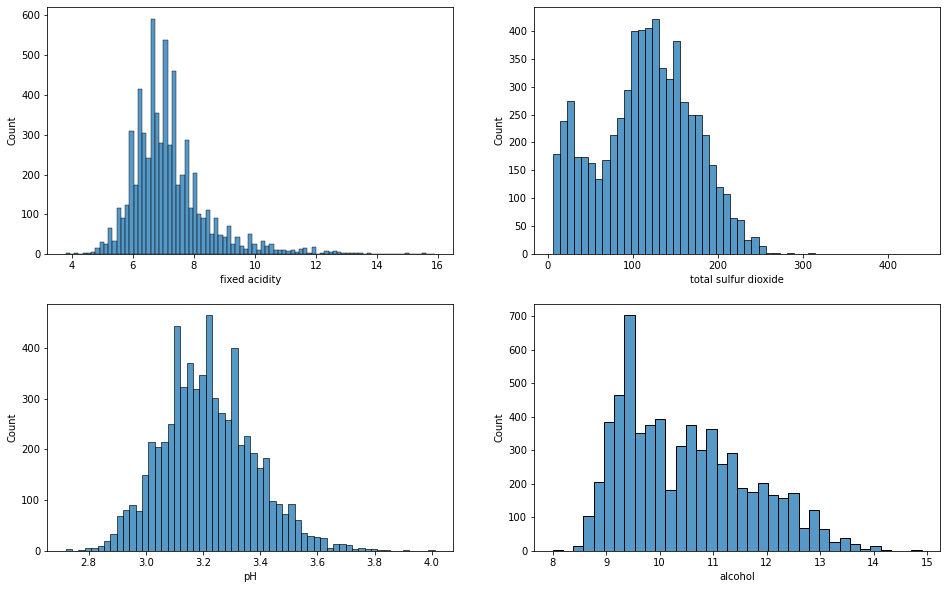

In [79]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

histo_list=['fixed acidity', 'total sulfur dioxide', 'pH', 'alcohol']
for histo, ax in zip(histo_list, axes.flat):
    sns.histplot(data=df_total, x=histo, ax=ax)
    #ax.set_title(histo)

plt.show()

left skewed는 왼쪽으로 꼬리가 길기 때문에, mean < median

right skewed는 오른쪽으로 꼬리가 길기 때문에, mean > median



In [93]:
for histo in histo_list :
    print("------------------")
    print(df_total[histo].median()<df_total[histo].mean())
    print()
    print(histo)
    print('-------------------')

------------------
True

fixed acidity
-------------------
------------------
False

total sulfur dioxide
-------------------
------------------
True

pH
-------------------
------------------
True

alcohol
-------------------


- Question) 특성 중 오른쪽으로 꼬리가 긴 분포(right skewed distribution)는 어떤것인가?
- Answer) total sulfur dioxide가 오른쪽으로 긴 분포라고 할 수 있다

### 3.2 새로 결합된 데이터 프레임으로 산점도 그리기
- quality와 아래의 특성들간의 상관관계 파악하기
- volatile acidity, residual sugar, pH, alcohol

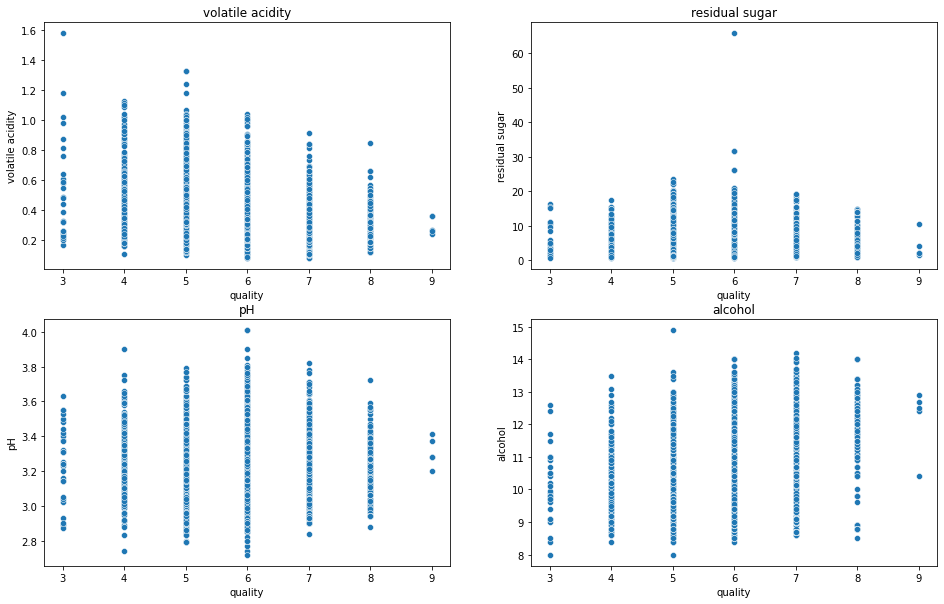

In [84]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

scatter_list=['volatile acidity', 'residual sugar', 'pH', 'alcohol']
for scatter, ax in zip(scatter_list, axes.flat):
    sns.scatterplot(data=df_total, x='quality',y=scatter, ax=ax)
    ax.set_title(scatter)

plt.show()

<AxesSubplot:>

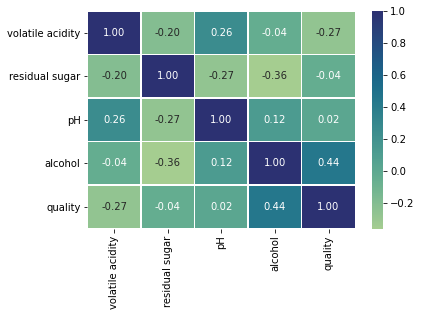

In [165]:
corr=df_total[scatter_list].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='crest', linewidth=0.5)

- Question) 품질에 긍정적인 영향을 미칠 가능성이 높은 특성은 어떤 것인가?
- Answer) 알콜이 가장 영향이 높다고 볼수있음

## Step 4: 결론 도출 또는 예측 (Draw conclusions or make predictions)

###  4.1 어떤 유형(white, red)의 와인이 더 좋은 평가를 받을까?

In [100]:
df_total['color'].value_counts()

W    4898
R    1599
Name: color, dtype: int64

In [113]:
k=df_total['quality']>=6
k=df_total[k]
k['color'].value_counts()

print(k['color'].value_counts()[0]/df_total['color'].value_counts()[0])  # white 6점이상
print(k['color'].value_counts()[1]/df_total['color'].value_counts()[1])  # red 6 점이상 

0.6651694569211923
0.5347091932457786


- **분석결과** : White가 좋은 평가를 받을 확률이 높다.

###  4.2 어느 정도의 산도가 와인 품질에 영향을 미칠까?
- 산도를 4등분하여 (low, medium, medium_high, high ) 어느 단계의 quality의 평균값이 높은지 확인하기

In [123]:
bins=[2.720000,3.110000,3.210000,3.320000,4.010000]
labels=['low','medium','medium_high','high']
ph_cats=pd.cut(df_total['pH'],bins,labels=labels)
ph_cats
df_total['ph cats']=ph_cats

In [125]:
df_total

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,ph cats
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,R,high
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,R,medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,R,medium_high
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,R,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,R,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,W,medium_high
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,W,medium
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,W,low
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,W,high


In [127]:
df_total.groupby('ph cats').mean()['quality']

ph cats
low            5.783343
medium         5.784540
medium_high    5.850832
high           5.859593
Name: quality, dtype: float64

- **분석결과** : 산도에 따라 조금씩 퀄리티 평균값이 올라감

###  4.3 더 달콤한 와인이 더 나은 평가를 받을까?


In [150]:
bins=[0,3.0,66]
labels=['less','more']
df_total['residual sugar']
sugar_cat=pd.cut(df_total['residual sugar'],bins,labels=labels)
df_total['sugar cat']=sugar_cat
df_total

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,ph cats,sugar cat
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,R,high,less
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,R,medium,less
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,R,medium_high,less
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,R,medium,less
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,R,high,less
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,W,medium_high,less
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,W,medium,more
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,W,low,less
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,W,high,less


In [167]:
df_total.groupby('sugar cat').mean()['quality']

sugar cat
less    5.807586
more    5.829306
Name: quality, dtype: float64

**분석 결과** : 별차이 없음

###  4.4  알코올 도수가 높은 와인이 더 좋은 평가를 받을까?

In [173]:
bins=[8.0,9.5,10.3,11.3,14.9]
labels=['low','medium','medium_high','high']
al_cats=pd.cut(df_total['alcohol'],bins,labels=labels)
ph_cats
df_total['al cats']=al_cats
df_total['al cats'].value_counts()

low            1870
medium_high    1629
high           1573
medium         1423
Name: al cats, dtype: int64

In [175]:
df_total.groupby('al cats').mean()['quality']

al cats
low            5.439572
medium         5.546030
medium_high    5.937999
high           6.393516
Name: quality, dtype: float64

**분석 결과** : 미디엄 이상에서 부터의 도수차이는 좋은 평가로 이어짐

## Step 5: 결과 공유 (Communicate the results)
보고서, 이메일, 블로그 등 다양한 방법을 통해 발견한 통찰들을 공유할 수 있다.